# NLP Ensemble approach
By Group 16

First Level: Multinomial Bayes model <br>
Second level: Support Vector Machine

I first experimented with how to feed the data into the first level of models.  I tried to see if the BOW MultinomialNB models or TF-IDF MultinomialNB models performed better.  I also tried to see if processing the words lead to better results.

At the second level, I tried Random Forest Classification, Support Vector Machine and Logistic Regression.  I went with  SVM in the end.



In [93]:
import re
import string
import numpy as np
import pandas as pd 
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, plot_roc_curve,roc_curve
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import nltk
nltk.download('stopwords')
from nltk.corpus import wordnet, stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hwhme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [94]:
df=pd.read_csv('fake_job_postings.csv')

In [95]:
df.fillna('empty',inplace=True)

In [96]:
columns=['job_id','telecommuting','has_company_logo','has_questions', 'salary_range','employment_type']
#remove columns not required for next steps 
for colu in columns:
    del df[colu]

In [97]:
#df.head()
X = df[["title", "company_profile", "description", "requirements","benefits"]]
Y = df["fraudulent"]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1)

In [99]:
X_train_title = X_train['title']
X_test_title = X_test['title']

X_train_profile = X_train["company_profile"]
X_test_profile = X_test["company_profile"]

X_train_description = X_train["description"]
X_test_description = X_test["description"]

X_train_requirements = X_train["requirements"]
X_test_requirements = X_test["requirements"]

X_train_benefits = X_train["benefits"]
X_test_benefits = X_test["benefits"]

features = {'title':(X_train_title, X_test_title),
            'profile':(X_train_profile, X_test_profile),
            'description':(X_train_description, X_test_description),
            'requirements':(X_train_requirements, X_test_requirements),
            'benefits':(X_train_benefits, X_test_benefits)}

## Bag of Words MultinomialNB Models

I used a MultinomialNB model after fitting in a BOW matrix for each column.

In [100]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

def tokenize_test(X_train, y_train, X_test, y_test, vect):
    X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
    X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')

    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()

    #RFC
    #nb = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100, criterion="entropy")
    
    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    print("--------Test Metrics--------")
    # print the accuracy of its predictions
    print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_class))
    print('Precision Score:', (metrics.precision_score(y_test, y_pred_class)))
    print('Recall Score:', (metrics.recall_score(y_test, y_pred_class)))
    print('F1 Score:', (metrics.f1_score(y_test, y_pred_class)))

    y_score_mnb = nb.predict_proba(X_test_dtm)
    print('ROC Score:', (metrics.roc_auc_score(y_test, y_score_mnb[:,1])))

In [101]:
from sklearn import metrics

for key, values in features.items():
  print("column : ", key.upper())
  tokenize_test(values[0], y_train, values[1], y_test, CountVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english', max_df=0.5))
  print("\n")

column :  TITLE


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1032085433.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1032085433.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  44209
Training Accuracy:  0.9674993785732041
--------Test Metrics--------
Accuracy Score: 0.9748322147651006
Precision Score: 0.8823529411764706
Recall Score: 0.4225352112676056
F1 Score: 0.5714285714285715
ROC Score: 0.92273208265317


column :  PROFILE


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1032085433.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1032085433.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  314867
Training Accuracy:  0.8693760874968929
--------Test Metrics--------
Accuracy Score: 0.8680089485458613
Precision Score: 0.06806282722513089
Recall Score: 0.18309859154929578
F1 Score: 0.09923664122137406
ROC Score: 0.8376918470637453


column :  DESCRIPTION


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1032085433.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1032085433.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  2688494
Training Accuracy:  0.9928535918468805
--------Test Metrics--------
Accuracy Score: 0.9821029082774049
Precision Score: 0.8979591836734694
Recall Score: 0.6197183098591549
F1 Score: 0.7333333333333333
ROC Score: 0.9029629143527442


column :  REQUIREMENTS


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1032085433.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1032085433.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  1426265
Training Accuracy:  0.9848993288590604
--------Test Metrics--------
Accuracy Score: 0.9793064876957495
Precision Score: 0.9722222222222222
Recall Score: 0.49295774647887325
F1 Score: 0.6542056074766356
ROC Score: 0.8539665482704027


column :  BENEFITS


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1032085433.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1032085433.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  293606
Training Accuracy:  0.9174123788217748
--------Test Metrics--------
Accuracy Score: 0.9630872483221476
Precision Score: 0.5409836065573771
Recall Score: 0.4647887323943662
F1 Score: 0.5
ROC Score: 0.8322491735503293




Some results: the description column seems to have a high f1 score.


## TFIDF MultinomialNB Models
The cleaned data is fitted by a tf-idf vectoriser and fed into MultinomialNB models.

In [102]:
from sklearn.naive_bayes import MultinomialNB

def tf_idf_test(X_train, y_train, X_test, y_test, vect):
    X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
    X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')
    # create tf-idf matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()

    
    # #RFC
    # nb = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100, criterion="entropy")

    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    print("--------Test Metrics--------")
    # print the accuracy of its predictions
    print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_class))
    print('Precision Score:', (metrics.precision_score(y_test, y_pred_class)))
    print('Recall Score:', (metrics.recall_score(y_test, y_pred_class)))
    print('F1 Score:', (metrics.f1_score(y_test, y_pred_class)))

    y_score_mnb = nb.predict_proba(X_test_dtm)
    print('ROC Score:', (metrics.roc_auc_score(y_test, y_score_mnb[:,1])))

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

for key, values in features.items():
  print("column : ", key.upper())
  tf_idf_test(values[0], y_train, values[1], y_test, TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english')) #, max_df=0.3
  print("\n")



column :  TITLE


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\2547024235.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\2547024235.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  44209
Training Accuracy:  0.9590479741486453
--------Test Metrics--------
Accuracy Score: 0.9681208053691275
Precision Score: 1.0
Recall Score: 0.19718309859154928
F1 Score: 0.32941176470588235
ROC Score: 0.8962897946795507


column :  PROFILE


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\2547024235.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\2547024235.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  314867
Training Accuracy:  0.9587994034302759
--------Test Metrics--------
Accuracy Score: 0.9574944071588367
Precision Score: 0.4074074074074074
Recall Score: 0.15492957746478872
F1 Score: 0.22448979591836735
ROC Score: 0.8714183763032476


column :  DESCRIPTION


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\2547024235.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\2547024235.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  2688494
Training Accuracy:  0.9622172508078548
--------Test Metrics--------
Accuracy Score: 0.9714765100671141
Precision Score: 1.0
Recall Score: 0.28169014084507044
F1 Score: 0.43956043956043955
ROC Score: 0.8463911014133724


column :  REQUIREMENTS


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\2547024235.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\2547024235.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  1426266
Training Accuracy:  0.9582401193139448
--------Test Metrics--------
Accuracy Score: 0.9697986577181208
Precision Score: 1.0
Recall Score: 0.23943661971830985
F1 Score: 0.38636363636363635
ROC Score: 0.8021729679181671


column :  BENEFITS


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\2547024235.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\2547024235.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  293606
Training Accuracy:  0.9654486701466567
--------Test Metrics--------
Accuracy Score: 0.9720357941834452
Precision Score: 1.0
Recall Score: 0.29577464788732394
F1 Score: 0.45652173913043476
ROC Score: 0.836686982699927




##Processed BOW in MultinomialNB models
This section includes steps in stemming and lemmatization before feeding the data into the count vectorizer.  

The results are mostly quite similar to unprocessed data.

In [104]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
revisions = [stemmer.stem(word) for word in X_train_title]

In [105]:
#revisions
# pip install tabulate
from tabulate import tabulate
print (tabulate({"Original": X_train_title[0:5],"Stemmed": revisions[0:5]}, headers="keys"))

Original                                         Stemmed
-----------------------------------------------  ----------------------------------------------
Lawn and Maintenance Contractors                 lawn and maintenance contractors
Digital Procurement Officer                      digital procurement offic
International Broadcaster, Azerbaijani Language  international broadcaster, azerbaijani languag
Head of Sales - B2B                              head of sales - b2b
Sales Consultant                                 sales consult


In [106]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer

def tokenize_test_stemmed(X_train, y_train, X_test, y_test, vect):
    X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
    X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')

    #Stemming
    stemmer = SnowballStemmer(language='english')
    X_train = [stemmer.stem(word) for word in X_train]
    X_test = [stemmer.stem(word) for word in X_test]

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    X_train = [lemmatizer.lemmatize(word) for word in X_train]
    X_test = [lemmatizer.lemmatize(word) for word in X_test]

    # create document-term matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)

    # stemmer = SnowballStemmer(language='english')
    # X_train_dtm = [stemmer.stem(word) for word in X_train_dtm]
    # X_test_dtm = [stemmer.stem(word) for word in X_train_dtm]
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()

    
    #RFC
    #nb = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100, criterion="entropy")

    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    print("--------Test Metrics--------")
    # print the accuracy of its predictions
    print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_class))
    print('Precision Score:', (metrics.precision_score(y_test, y_pred_class)))
    print('Recall Score:', (metrics.recall_score(y_test, y_pred_class)))
    print('F1 Score:', (metrics.f1_score(y_test, y_pred_class)))

    y_score_mnb = nb.predict_proba(X_test_dtm)
    print('ROC Score:', (metrics.roc_auc_score(y_test, y_score_mnb[:,1])))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hwhme\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hwhme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [107]:
from sklearn import metrics

for key, values in features.items():
  print("column : ", key.upper())
  tokenize_test_stemmed(values[0], y_train, values[1], y_test, CountVectorizer(lowercase=True, ngram_range=(1, 4), stop_words='english', max_df=0.5))  #, max_df = 0.5
  print("\n")

column :  TITLE


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1722342225.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1722342225.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  41884
Training Accuracy:  0.9696743723589362
--------Test Metrics--------
Accuracy Score: 0.9742729306487695
Precision Score: 0.8787878787878788
Recall Score: 0.4084507042253521
F1 Score: 0.5576923076923077
ROC Score: 0.9138974792259673


column :  PROFILE


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1722342225.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1722342225.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  299560
Training Accuracy:  0.870308227690778
--------Test Metrics--------
Accuracy Score: 0.8708053691275168
Precision Score: 0.06989247311827956
Recall Score: 0.18309859154929578
F1 Score: 0.10116731517509725
ROC Score: 0.8396974743041827


column :  DESCRIPTION


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1722342225.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1722342225.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  2579588
Training Accuracy:  0.9937235893611732
--------Test Metrics--------
Accuracy Score: 0.9821029082774049
Precision Score: 0.8979591836734694
Recall Score: 0.6197183098591549
F1 Score: 0.7333333333333333
ROC Score: 0.9033402511750761


column :  REQUIREMENTS


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1722342225.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1722342225.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  1372779
Training Accuracy:  0.9844021874223217
--------Test Metrics--------
Accuracy Score: 0.9787472035794184
Precision Score: 0.9714285714285714
Recall Score: 0.4788732394366197
F1 Score: 0.6415094339622641
ROC Score: 0.8559762769980395


column :  BENEFITS


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1722342225.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\1722342225.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  277467
Training Accuracy:  0.9200223713646533
--------Test Metrics--------
Accuracy Score: 0.9608501118568232
Precision Score: 0.5081967213114754
Recall Score: 0.43661971830985913
F1 Score: 0.46969696969696967
ROC Score: 0.8213064057027077




##Processed TF-IDF in Multinomial Models

The textual columns were cleaned, tokenized, stemmed, lemmatized etc and fed into MultinomialNB models

In [108]:
from sklearn.naive_bayes import MultinomialNB
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer

def tf_idf_test_processed(X_train, y_train, X_test, y_test, vect):
    X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
    X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')

    #Stemming
    stemmer = SnowballStemmer(language='english')
    X_train = [stemmer.stem(word) for word in X_train]
    X_test = [stemmer.stem(word) for word in X_test]

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    X_train = [lemmatizer.lemmatize(word) for word in X_train]
    X_test = [lemmatizer.lemmatize(word) for word in X_test]

    # create tf-idf matrices using the vectorizer
    X_train_dtm = vect.fit_transform(X_train)
    X_test_dtm = vect.transform(X_test)
    
    # print the number of features that were generated
    print('Features: ', X_train_dtm.shape[1])
    
    # use Multinomial Naive Bayes to predict the star rating
    nb = MultinomialNB()

    
    # #RFC
    # nb = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=100, criterion="entropy")

    nb.fit(X_train_dtm, y_train)
    y_pred_class = nb.predict(X_test_dtm)
    
    # Get the training accuracy
    print('Training Accuracy: ', metrics.accuracy_score(y_train, nb.predict(X_train_dtm)))
    print("--------Test Metrics--------")
    # print the accuracy of its predictions
    print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_class))
    print('Precision Score:', (metrics.precision_score(y_test, y_pred_class)))
    print('Recall Score:', (metrics.recall_score(y_test, y_pred_class)))
    print('F1 Score:', (metrics.f1_score(y_test, y_pred_class)))

    y_score_mnb = nb.predict_proba(X_test_dtm)
    print('ROC Score:', (metrics.roc_auc_score(y_test, y_score_mnb[:,1])))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hwhme\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hwhme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

for key, values in features.items():
  print("column : ", key.upper())
  tf_idf_test_processed(values[0], y_train, values[1], y_test, TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english'))
  print("\n")

column :  TITLE


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\875048184.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\875048184.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  41884
Training Accuracy:  0.9586751180710912
--------Test Metrics--------
Accuracy Score: 0.9681208053691275
Precision Score: 1.0
Recall Score: 0.19718309859154928
F1 Score: 0.32941176470588235
ROC Score: 0.8820863445085187


column :  PROFILE


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\875048184.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\875048184.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  299560
Training Accuracy:  0.9602286850608999
--------Test Metrics--------
Accuracy Score: 0.959731543624161
Precision Score: 0.4782608695652174
Recall Score: 0.15492957746478872
F1 Score: 0.23404255319148937
ROC Score: 0.8444880113529165


column :  DESCRIPTION


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\875048184.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\875048184.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  2579588
Training Accuracy:  0.960974397216008
--------Test Metrics--------
Accuracy Score: 0.970917225950783
Precision Score: 1.0
Recall Score: 0.2676056338028169
F1 Score: 0.42222222222222217
ROC Score: 0.8462270419254022


column :  REQUIREMENTS


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\875048184.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\875048184.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  1372780
Training Accuracy:  0.9582401193139448
--------Test Metrics--------
Accuracy Score: 0.9697986577181208
Precision Score: 1.0
Recall Score: 0.23943661971830985
F1 Score: 0.38636363636363635
ROC Score: 0.8263061185986038


column :  BENEFITS


C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\875048184.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train = X_train.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\875048184.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test = X_test.str.replace('[^a-zA-Z0-9 ]', '')


Features:  277467
Training Accuracy:  0.9645165299527716
--------Test Metrics--------
Accuracy Score: 0.9720357941834452
Precision Score: 1.0
Recall Score: 0.29577464788732394
F1 Score: 0.45652173913043476
ROC Score: 0.7748652661455042




##Findings from tuning
There is no significant difference in model performance whether the data is processed or not.  However, the inclusion of unigram, bigram, trigram and quadgrams greatly improve f1 score.  This would imply that certain phrases are highly predictive of fraud entries.

#Ensemble Learning first level
First, I cleaned the data, removed stop words, stemmed, lemmatized the data using the NLTK package.  Then I created countVectorizers objects to tokenize the data.  This can also help me retrieve feature importance later.

I obtain 5 BOW matrices and 5 TF-IDF matrices from the 5 columns. Then, I fed each matrix into a MultinomialNB model each to give me 10 columns of predicted results.

In [110]:
cv_title = CountVectorizer(lowercase=True, ngram_range=(1, 4), stop_words='english', max_df=0.5)
cv_profile = CountVectorizer(lowercase=True, ngram_range=(1, 4), stop_words='english', max_df=0.5)
cv_description = CountVectorizer(lowercase=True, ngram_range=(1, 4), stop_words='english', max_df=0.5)
cv_requirement = CountVectorizer(lowercase=True, ngram_range=(1, 4), stop_words='english', max_df=0.5)
cv_benefit = CountVectorizer(lowercase=True, ngram_range=(1, 4), stop_words='english', max_df=0.5)

In [111]:
import nltk
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer(language='english')
lemmatizer = WordNetLemmatizer()

X_train_title = X_train_title.str.replace('[^a-zA-Z0-9 ]', '')
X_test_title = X_test_title.str.replace('[^a-zA-Z0-9 ]', '')

X_train_profile = X_train_profile.str.replace('[^a-zA-Z0-9 ]', '')
X_test_profile = X_test_profile.str.replace('[^a-zA-Z0-9 ]', '')

X_train_description = X_train_description.str.replace('[^a-zA-Z0-9 ]', '')
X_test_description = X_test_description.str.replace('[^a-zA-Z0-9 ]', '')

X_train_requirements = X_train_requirements.str.replace('[^a-zA-Z0-9 ]', '')
X_test_requirements = X_test_requirements.str.replace('[^a-zA-Z0-9 ]', '')

X_train_benefits = X_train_benefits.str.replace('[^a-zA-Z0-9 ]', '')
X_test_benefits = X_test_benefits.str.replace('[^a-zA-Z0-9 ]', '')

#stemming
X_train_title_pro = [stemmer.stem(word) for word in X_train_title]
X_test_title_pro = [stemmer.stem(word) for word in X_test_title]

X_train_profile_pro = [stemmer.stem(word) for word in X_train_profile]
X_test_profile_pro = [stemmer.stem(word) for word in X_test_profile]

X_train_description_pro = [stemmer.stem(word) for word in X_train_description]
X_test_description_pro = [stemmer.stem(word) for word in X_test_description]

X_train_requirements_pro = [stemmer.stem(word) for word in X_train_requirements]
X_test_requirements_pro = [stemmer.stem(word) for word in X_test_requirements]

X_train_benefits_pro = [stemmer.stem(word) for word in X_train_benefits]
X_test_benefits_pro = [stemmer.stem(word) for word in X_test_benefits]

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hwhme\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hwhme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\3034138221.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train_title = X_train_title.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\3034138221.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test_title = X_test_title.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users\hwhme\AppData\Local\Temp\ipykernel_4556\3034138221.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train_profile = X_train_profile.str.replace('[^a-zA-Z0-9 ]', '')
C:\Users

In [112]:
#lemmatization
X_train_title_pro = [lemmatizer.lemmatize(word) for word in X_train_title]
X_test_title_pro = [lemmatizer.lemmatize(word) for word in X_test_title]

X_train_profile_pro = [lemmatizer.lemmatize(word) for word in X_train_profile]
X_test_profile_pro = [lemmatizer.lemmatize(word) for word in X_test_profile]

X_train_description_pro = [lemmatizer.lemmatize(word) for word in X_train_description]
X_test_description_pro = [lemmatizer.lemmatize(word) for word in X_test_description]

X_train_requirements_pro = [lemmatizer.lemmatize(word) for word in X_train_requirements]
X_test_requirements_pro = [lemmatizer.lemmatize(word) for word in X_test_requirements]

X_train_benefits_pro = [lemmatizer.lemmatize(word) for word in X_train_benefits]
X_test_benefits_pro = [lemmatizer.lemmatize(word) for word in X_test_benefits]

In [113]:
features_pro = {'title':(X_train_title_pro, X_test_title_pro),
            'profile':(X_train_profile_pro, X_test_profile_pro),
            'description':(X_train_description_pro, X_test_description_pro),
            'requirements':(X_train_requirements_pro, X_test_requirements_pro),
            'benefits':(X_train_benefits_pro, X_test_benefits_pro)}

In [114]:
nb_title = MultinomialNB()
nb_profile = MultinomialNB()
nb_description = MultinomialNB()
nb_requirements = MultinomialNB()
nb_benefits = MultinomialNB()

In [115]:
X_train_title_bow = cv_title.fit_transform(X_train_title_pro)
X_test_title_bow = cv_title.transform(X_test_title_pro)

X_train_profile_bow = cv_profile.fit_transform(X_train_profile_pro)
X_test_profile_bow = cv_profile.transform(X_test_profile_pro)

X_train_description_bow = cv_description.fit_transform(X_train_description_pro)
X_test_description_bow = cv_description.transform(X_test_description_pro)

X_train_requirements_bow = cv_requirement.fit_transform(X_train_requirements_pro)
X_test_requirements_bow = cv_requirement.transform(X_test_requirements_pro)

X_train_benefits_bow = cv_benefit.fit_transform(X_train_benefits_pro)
X_test_benefits_bow = cv_benefit.transform(X_test_benefits_pro)

In [116]:
# defining parameter range 
from sklearn.model_selection import GridSearchCV
nb_param_grid = {'alpha': [1, 0, 0.1, 0.01, 0.001],  
              'fit_prior': [False, True], 
              }  
   
nb_title_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
nb_profile_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
nb_description_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
nb_requirements_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
nb_benefits_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 

In [117]:
# fitting the model for grid search 
nb_title_tuned = nb_title_tuned.fit(X_train_title_bow, y_train)
nb_profile_tuned = nb_profile_tuned.fit(X_train_profile_bow, y_train)
nb_description_tuned = nb_description_tuned.fit(X_train_description_bow, y_train)
nb_requirements_tuned = nb_requirements_tuned.fit(X_train_requirements_bow, y_train)
nb_benefits_tuned = nb_benefits_tuned.fit(X_train_benefits_bow, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.833 total time=   0.0s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.812 total time=   0.0s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.848 total time=   0.0s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.833 total time=   0.0s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.812 total time=   0.0s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.848 total time=   0.0s
[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.887 total time=   0.0s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.879 total time=   0.0s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.882 total time=   0.0s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.888 total time=   0.0s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.879 total time=   0.0s
[CV 3/3] END ...........alpha=0, fit_prior=True;

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warni

[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.838 total time=   0.0s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.845 total time=   0.0s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.836 total time=   0.0s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.839 total time=   0.0s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.846 total time=   0.0s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.836 total time=   0.0s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warni

[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.940 total time=   0.0s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.939 total time=   0.0s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.936 total time=   0.0s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.940 total time=   0.0s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.939 total time=   0.0s
[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.936 total time=   0.0s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.867 total time=   0.0s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.876 total time=   0.0s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.867 total time=   0.0s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.868 total time=   0.0s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.876 total time=   0.0s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.867 total time=   0.0s
[CV 1/3] END .......alpha=0.

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.916 total time=   0.1s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.919 total time=   0.1s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.930 total time=   0.1s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.919 total time=   0.1s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.921 total time=   0.1s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.932 total time=   0.1s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.940 total time=   0.1s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.933 total time=   0.1s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.939 total time=   0.1s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.940 total time=   0.1s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.933 total time=   0.1s
[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.940 total time=   0.1s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.747 total time=   0.1s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.746 total time=   0.1s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.741 total time=   0.1s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.747 total time=   0.1s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.748 total time=   0.1s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.743 total time=   0.1s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.760 total time=   0.1s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.758 total time=   0.1s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.754 total time=   0.1s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.760 total time=   0.1s
[CV 2/3] END ........alpha=0

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.845 total time=   0.0s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.821 total time=   0.0s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.855 total time=   0.0s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.845 total time=   0.0s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.822 total time=   0.0s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.855 total time=   0.0s
[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.884 total time=   0.0s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.867 total time=   0.0s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.889 total time=   0.0s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.884 total time=   0.0s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.867 total time=   0.0s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.889 total time=   0.0s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.653 total time=   0.0s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.680 total time=   0.0s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.688 total time=   0.0s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.654 total time=   0.0s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.680 total time=   0.0s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.689 total time=   0.0s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.672 total time=   0.0s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.689 total time=   0.0s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.700 total time=   0.0s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.671 total time=   0.0s
[CV 2/3] END ........alpha=0.01, fit_prior=True;, score=0.690 total time=   0.0s
[CV 3/3] END ........alpha=0

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.793 total time=   0.0s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.789 total time=   0.0s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.741 total time=   0.0s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.793 total time=   0.0s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.790 total time=   0.0s
[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.790 total time=   0.0s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.853 total time=   0.0s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.851 total time=   0.0s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warni

[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.790 total time=   0.0s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.853 total time=   0.0s
[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.851 total time=   0.0s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.744 total time=   0.0s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.794 total time=   0.0s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.785 total time=   0.0s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.744 total time=   0.0s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.795 total time=   0.0s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.786 total time=   0.0s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.761 total time=   0.0s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.805 total time=   0.0s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.802 total time=   0.0s
[CV 1/3] END ........alpha=0

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


This gives the best multinomialNB parameters.

In [118]:
# print best parameter after tuning 
print(nb_title_tuned.best_params_) 
print(nb_profile_tuned.best_params_) 
print(nb_description_tuned.best_params_) 
print(nb_requirements_tuned.best_params_) 
print(nb_benefits_tuned.best_params_)

#result:
# {'alpha': 0, 'fit_prior': True}
# {'alpha': 0, 'fit_prior': True}
# {'alpha': 0, 'fit_prior': True}
# {'alpha': 0, 'fit_prior': True}
# {'alpha': 0, 'fit_prior': True}

{'alpha': 0, 'fit_prior': True}
{'alpha': 0, 'fit_prior': True}
{'alpha': 0, 'fit_prior': True}
{'alpha': 0, 'fit_prior': True}
{'alpha': 0, 'fit_prior': True}


In [119]:
nb_title_train_pred = nb_title_tuned.predict(X_train_title_bow)
nb_profile_train_pred = nb_profile_tuned.predict(X_train_profile_bow)
nb_description_train_pred = nb_description_tuned.predict(X_train_description_bow)
nb_requirements_train_pred = nb_requirements_tuned.predict(X_train_requirements_bow)
nb_benefits_train_pred = nb_benefits_tuned.predict(X_train_benefits_bow)

In [120]:
X_train_pred = [nb_title_train_pred, nb_profile_train_pred, nb_description_train_pred, nb_description_train_pred, nb_benefits_train_pred]
X_train_pred = np.array(X_train_pred)
X_train_pred = X_train_pred.T

In [121]:
rfc = RandomForestClassifier(oob_score = True)
result = rfc.fit(X_train_pred,y_train)

Accuracy Score: 0.9995650012428536
Precision Score: 0.993734335839599
Recall Score: 0.9974842767295597
F1 Score: 0.9956057752667922
ROC Score: 0.9993014209634561


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


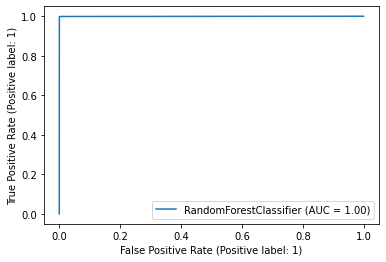

In [122]:
#Training results
y_train_rfc_pred = rfc.predict(X_train_pred)

print('Accuracy Score:', (accuracy_score(y_train, y_train_rfc_pred)))
print('Precision Score:', (precision_score(y_train, y_train_rfc_pred)))
print('Recall Score:', (recall_score(y_train,y_train_rfc_pred)))
print('F1 Score:', (f1_score(y_train, y_train_rfc_pred)))

y_score_rf = rfc.predict_proba(X_train_pred)
print('ROC Score:', (roc_auc_score(y_train, y_score_rf[:,1])))
print(plot_roc_curve(rfc, X_train_pred, y_train))

In [123]:
#Finding X_test_pred from making mnb predictions
nb_title_test_pred = nb_title_tuned.predict(X_test_title_bow)
nb_profile_test_pred = nb_profile_tuned.predict(X_test_profile_bow)
nb_description_test_pred = nb_description_tuned.predict(X_test_description_bow)
nb_requirements_test_pred = nb_requirements_tuned.predict(X_test_requirements_bow)
nb_benefits_test_pred = nb_benefits_tuned.predict(X_test_benefits_bow)

In [124]:
X_test_pred = [nb_title_test_pred, nb_profile_test_pred, nb_description_test_pred, nb_description_test_pred, nb_benefits_test_pred]
X_test_pred = np.array(X_test_pred)
X_test_pred = X_test_pred.T

I fitted the BOW models into a random forest and generated a f1 of 0.8.

Accuracy Score: 0.9871364653243848
Precision Score: 0.98
Recall Score: 0.6901408450704225
F1 Score: 0.8099173553719008
ROC Score: 0.8817213121477848


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


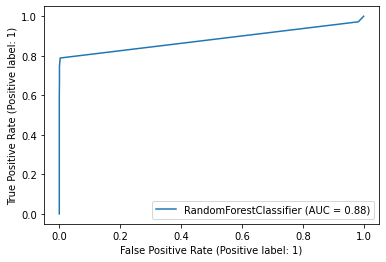

In [125]:
#Testing results
y_test_rfc_pred = rfc.predict(X_test_pred)

print('Accuracy Score:', (accuracy_score(y_test, y_test_rfc_pred)))
print('Precision Score:', (precision_score(y_test, y_test_rfc_pred)))
print('Recall Score:', (recall_score(y_test,y_test_rfc_pred)))
print('F1 Score:', (f1_score(y_test, y_test_rfc_pred)))

y_score_rf_test = rfc.predict_proba(X_test_pred)
print('ROC Score:', (roc_auc_score(y_test, y_score_rf_test[:,1])))
print(plot_roc_curve(rfc, X_test_pred, y_test))

In [126]:
#inclusion of tfidf

In [127]:
tfidf_vect_title = TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english')
tfidf_vect_profile = TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english')
tfidf_vect_description = TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english')
tfidf_vect_requirements = TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english')
tfidf_vect_benefits = TfidfVectorizer(lowercase=False, ngram_range=(1, 4), stop_words='english')

tfidfnb_title_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
tfidfnb_profile_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
tfidfnb_description_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
tfidfnb_requirements_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 
tfidfnb_benefits_tuned = GridSearchCV(MultinomialNB(), nb_param_grid,cv = 3,scoring = 'roc_auc',verbose = 3) 

In [128]:
X_train_title_tfidf = tfidf_vect_title.fit_transform(X_train_title_pro)
X_test_title_tfidf = tfidf_vect_title.transform(X_test_title_pro)

X_train_profile_tfidf = tfidf_vect_profile.fit_transform(X_train_profile_pro)
X_test_profile_tfidf = tfidf_vect_profile.transform(X_test_profile_pro)

X_train_description_tfidf = tfidf_vect_description.fit_transform(X_train_description_pro)
X_test_description_tfidf = tfidf_vect_description.transform(X_test_description_pro)

X_train_requirements_tfidf = tfidf_vect_requirements.fit_transform(X_train_requirements_pro)
X_test_requirements_tfidf = tfidf_vect_requirements.transform(X_test_requirements_pro)

X_train_benefits_tfidf = tfidf_vect_benefits.fit_transform(X_train_benefits_pro)
X_test_benefits_tfidf = tfidf_vect_benefits.transform(X_test_benefits_pro)

In [129]:
# fitting the model for grid search 
nb_title_tuned_tfidf = tfidfnb_title_tuned.fit(X_train_title_tfidf, y_train)
nb_profile_tuned_tfidf = tfidfnb_profile_tuned.fit(X_train_profile_tfidf, y_train)
nb_description_tuned_tfidf = tfidfnb_description_tuned.fit(X_train_description_tfidf, y_train)
nb_requirements_tuned_tfidf = tfidfnb_requirements_tuned.fit(X_train_requirements_tfidf, y_train)
nb_benefits_tuned_tfidf = tfidfnb_benefits_tuned.fit(X_train_benefits_tfidf, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.822 total time=   0.0s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.793 total time=   0.0s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.834 total time=   0.0s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.822 total time=   0.0s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.793 total time=   0.0s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.834 total time=   0.0s
[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.893 total time=   0.0s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.882 total time=   0.0s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.894 total time=   0.0s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.893 total time=   0.0s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.882 total time=   0.0s
[CV 3/3] END ...........alpha=0, fit_prior=True;

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warni

[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.895 total time=   0.0s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.899 total time=   0.0s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.893 total time=   0.0s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.895 total time=   0.0s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.899 total time=   0.0s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.893 total time=   0.0s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warni

[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.920 total time=   0.0s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.921 total time=   0.0s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.916 total time=   0.0s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.920 total time=   0.0s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.921 total time=   0.0s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.916 total time=   0.0s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.838 total time=   0.0s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.846 total time=   0.0s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.834 total time=   0.0s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.838 total time=   0.0s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.846 total time=   0.0s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.834 total time=   0.0s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.864 total time=   0.0s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.867 total time=   0.0s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.861 total time=   0.0s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.865 total time=   0.0s
[CV 2/3] END ........alpha=0.01, fit_prior=True;, score=0.868 total time=   0.0s
[CV 3/3] END ........alpha=0

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.889 total time=   0.1s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.892 total time=   0.1s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.887 total time=   0.1s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.889 total time=   0.1s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.892 total time=   0.1s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.887 total time=   0.1s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.953 total time=   0.1s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.952 total time=   0.1s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.956 total time=   0.1s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.953 total time=   0.1s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.953 total time=   0.1s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.956 total time=   0.1s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.931 total time=   0.1s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.938 total time=   0.1s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.946 total time=   0.2s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.931 total time=   0.1s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.938 total time=   0.1s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.946 total time=   0.1s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.889 total time=   0.1s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.900 total time=   0.1s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.909 total time=   0.1s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.891 total time=   0.1s
[CV 2/3] END ........alpha=0.01, fit_prior=True;, score=0.902 total time=   0.1s
[CV 3/3] END ........alpha=0

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.806 total time=   0.0s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.784 total time=   0.0s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.796 total time=   0.0s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.806 total time=   0.0s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.784 total time=   0.0s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.796 total time=   0.0s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.878 total time=   0.0s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.869 total time=   0.0s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.899 total time=   0.0s


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.878 total time=   0.0s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.870 total time=   0.0s
[CV 3/3] END ...........alpha=0, fit_prior=True;, score=0.899 total time=   0.0s
[CV 1/3] END ........alpha=0.1, fit_prior=False;, score=0.829 total time=   0.0s
[CV 2/3] END ........alpha=0.1, fit_prior=False;, score=0.821 total time=   0.0s
[CV 3/3] END ........alpha=0.1, fit_prior=False;, score=0.867 total time=   0.0s
[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.829 total time=   0.0s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.821 total time=   0.0s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.867 total time=   0.0s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.752 total time=   0.0s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.766 total time=   0.0s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.809 total time=   0.0s
[CV 1/3] END ........alpha=0

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END ..........alpha=1, fit_prior=False;, score=0.780 total time=   0.0s
[CV 2/3] END ..........alpha=1, fit_prior=False;, score=0.816 total time=   0.0s
[CV 3/3] END ..........alpha=1, fit_prior=False;, score=0.814 total time=   0.0s
[CV 1/3] END ...........alpha=1, fit_prior=True;, score=0.780 total time=   0.0s
[CV 2/3] END ...........alpha=1, fit_prior=True;, score=0.816 total time=   0.0s
[CV 3/3] END ...........alpha=1, fit_prior=True;, score=0.814 total time=   0.0s
[CV 1/3] END ..........alpha=0, fit_prior=False;, score=0.804 total time=   0.0s
[CV 2/3] END ..........alpha=0, fit_prior=False;, score=0.854 total time=   0.0s
[CV 3/3] END ..........alpha=0, fit_prior=False;, score=0.858 total time=   0.0s
[CV 1/3] END ...........alpha=0, fit_prior=True;, score=0.804 total time=   0.0s
[CV 2/3] END ...........alpha=0, fit_prior=True;, score=0.854 total time=   0.0s
[CV 3/3] END ...........alpha=0, fit_prior=True;

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


[CV 1/3] END .........alpha=0.1, fit_prior=True;, score=0.773 total time=   0.0s
[CV 2/3] END .........alpha=0.1, fit_prior=True;, score=0.818 total time=   0.0s
[CV 3/3] END .........alpha=0.1, fit_prior=True;, score=0.815 total time=   0.0s
[CV 1/3] END .......alpha=0.01, fit_prior=False;, score=0.767 total time=   0.0s
[CV 2/3] END .......alpha=0.01, fit_prior=False;, score=0.817 total time=   0.0s
[CV 3/3] END .......alpha=0.01, fit_prior=False;, score=0.811 total time=   0.0s
[CV 1/3] END ........alpha=0.01, fit_prior=True;, score=0.767 total time=   0.0s
[CV 2/3] END ........alpha=0.01, fit_prior=True;, score=0.817 total time=   0.0s
[CV 3/3] END ........alpha=0.01, fit_prior=True;, score=0.812 total time=   0.0s
[CV 1/3] END ......alpha=0.001, fit_prior=False;, score=0.784 total time=   0.0s
[CV 2/3] END ......alpha=0.001, fit_prior=False;, score=0.829 total time=   0.0s
[CV 3/3] END ......alpha=0.001, fit_prior=False;, score=0.827 total time=   0.0s
[CV 1/3] END .......alpha=0.

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [130]:
nb_title_train_pred_tfidf = nb_title_tuned_tfidf.predict(X_train_title_tfidf)
nb_profile_train_pred_tfidf = nb_profile_tuned_tfidf.predict(X_train_profile_tfidf)
nb_description_train_pred_tfidf = nb_description_tuned_tfidf.predict(X_train_description_tfidf)
nb_requirements_train_pred_tfidf = nb_requirements_tuned_tfidf.predict(X_train_requirements_tfidf)
nb_benefits_train_pred_tfidf = nb_benefits_tuned_tfidf.predict(X_train_benefits_tfidf)

In [131]:
X_train_pred_tfidf = [nb_title_train_pred_tfidf, nb_profile_train_pred_tfidf, nb_description_train_pred_tfidf, nb_description_train_pred_tfidf, nb_benefits_train_pred_tfidf]
X_train_pred_tfidf = np.array(X_train_pred_tfidf)
X_train_pred_tfidf = X_train_pred_tfidf.T
#X_train_pred_tfidf = X_train_pred_tfidf[:,[0,2,3]]
X_train_pred_tfidf

array([[1, 0, 1, 1, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int64)

#Ensemble Learning Second level

The following models were attempted for the second level of the ensemble:
*   Random Forest
*   Support Vector Machine
*   Logistic Regression

These models are relatively simple and explainable which leaves most of the complexity at the first level of the ensemble.

## Random Forest
I found that the f1 and ROC-AUC scores were not as good as the other models.

Accuracy Score: 0.9996271439224459
Precision Score: 0.9949811794228356
Recall Score: 0.9974842767295597
F1 Score: 0.9962311557788944
ROC Score: 0.9993220605182995


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


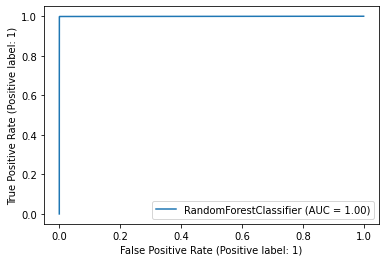

In [132]:
#Training results
rfc2 = RandomForestClassifier(oob_score = True, criterion = "entropy")
result = rfc2.fit(X_train_pred_tfidf,y_train)
y_train_rfc_pred_tfidf = rfc2.predict(X_train_pred_tfidf)

print('Accuracy Score:', (accuracy_score(y_train, y_train_rfc_pred_tfidf)))
print('Precision Score:', (precision_score(y_train, y_train_rfc_pred_tfidf)))
print('Recall Score:', (recall_score(y_train,y_train_rfc_pred_tfidf)))
print('F1 Score:', (f1_score(y_train, y_train_rfc_pred_tfidf)))

y_score_rf_tfidf = rfc2.predict_proba(X_train_pred_tfidf)
print('ROC Score:', (roc_auc_score(y_train, y_score_rf_tfidf[:,1])))
print(plot_roc_curve(rfc2, X_train_pred_tfidf, y_train))

[[0 0 0 0 0]
 [1 0 0 0 0]
 [1 0 1 1 1]
 ...
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
Accuracy Score: 0.9865771812080537
Precision Score: 0.9795918367346939
Recall Score: 0.676056338028169
F1 Score: 0.8
ROC Score: 0.8229100871976178


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


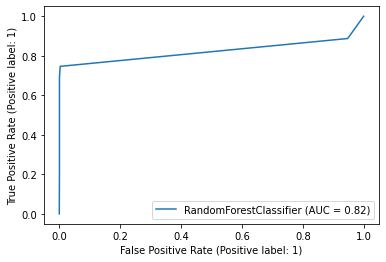

In [133]:
nb_title_test_pred_tfidf = nb_title_tuned_tfidf.predict(X_test_title_tfidf)
nb_profile_test_pred_tfidf = nb_profile_tuned_tfidf.predict(X_test_profile_tfidf)
nb_description_test_pred_tfidf = nb_description_tuned_tfidf.predict(X_test_description_tfidf)
nb_requirements_test_pred_tfidf = nb_requirements_tuned_tfidf.predict(X_test_requirements_tfidf)
nb_benefits_test_pred_tfidf = nb_benefits_tuned_tfidf.predict(X_test_benefits_tfidf)

X_test_pred_tfidf = [nb_title_test_pred_tfidf, nb_profile_test_pred_tfidf, nb_description_test_pred_tfidf, nb_description_test_pred_tfidf, nb_benefits_test_pred_tfidf]
X_test_pred_tfidf = np.array(X_test_pred_tfidf)
X_test_pred_tfidf = X_test_pred_tfidf.T
#X_test_pred_tfidf = X_test_pred_tfidf[:,[0,2,3]]
print(X_test_pred_tfidf)

#Test results
y_test_rfc_pred_tfidf = rfc2.predict(X_test_pred_tfidf)

print('Accuracy Score:', (accuracy_score(y_test, y_test_rfc_pred_tfidf)))
print('Precision Score:', (precision_score(y_test, y_test_rfc_pred_tfidf)))
print('Recall Score:', (recall_score(y_test,y_test_rfc_pred_tfidf)))
print('F1 Score:', (f1_score(y_test, y_test_rfc_pred_tfidf)))

y_score_rf_tfidf = rfc2.predict_proba(X_test_pred_tfidf)
print('ROC Score:', (roc_auc_score(y_test, y_score_rf_tfidf[:,1])))
print(plot_roc_curve(rfc2, X_test_pred_tfidf, y_test))

Accuracy Score: 0.9854586129753915
Precision Score: 0.953125
Recall Score: 0.7261904761904762
F1 Score: 0.8243243243243242
ROC Score: 0.908824474625531

In [134]:
x_train_bowandtfidf =  np.hstack((X_train_pred[:,[0, 1, 2,3, 4]], X_train_pred_tfidf[:,[0, 1, 2,3, 4]]))
rfc3 = RandomForestClassifier(oob_score = True, criterion = 'gini')
result3 = rfc3.fit(x_train_bowandtfidf,y_train)

Accuracy Score: 0.9996271439224459
Precision Score: 0.9949811794228356
Recall Score: 0.9974842767295597
F1 Score: 0.9962311557788944
ROC Score: 0.999326829817825


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


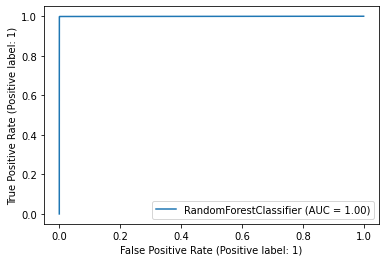

In [135]:
y_train_rfc_pred_bowandtfidf = rfc3.predict(x_train_bowandtfidf)

print('Accuracy Score:', (accuracy_score(y_train, y_train_rfc_pred_bowandtfidf)))
print('Precision Score:', (precision_score(y_train, y_train_rfc_pred_bowandtfidf)))
print('Recall Score:', (recall_score(y_train,y_train_rfc_pred_bowandtfidf)))
print('F1 Score:', (f1_score(y_train, y_train_rfc_pred_bowandtfidf)))

y_score_rf_bowandtfidf = rfc3.predict_proba(x_train_bowandtfidf)
print('ROC Score:', (roc_auc_score(y_train, y_score_rf_bowandtfidf[:,1])))
print(plot_roc_curve(rfc3, x_train_bowandtfidf, y_train))

Accuracy Score: 0.9865771812080537
Precision Score: 0.9795918367346939
Recall Score: 0.676056338028169
F1 Score: 0.8
ROC Score: 0.8504802841510332


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


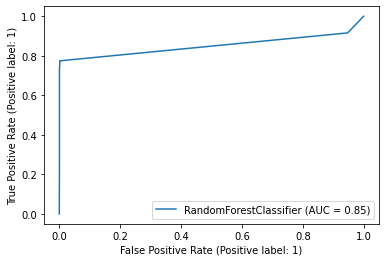

In [136]:
X_test_bowandtfidf =  np.hstack((X_test_pred[:,[0,1 ,2,3, 4]], X_test_pred_tfidf[:,[0,1,2,3,4]]))

#Test results
y_test_rfc_pred_bowandtfidf = rfc3.predict(X_test_bowandtfidf)

print('Accuracy Score:', (accuracy_score(y_test, y_test_rfc_pred_bowandtfidf)))
print('Precision Score:', (precision_score(y_test, y_test_rfc_pred_bowandtfidf)))
print('Recall Score:', (recall_score(y_test,y_test_rfc_pred_bowandtfidf)))
print('F1 Score:', (f1_score(y_test, y_test_rfc_pred_bowandtfidf)))

y_score_rf_bowandtfidf = rfc3.predict_proba(X_test_bowandtfidf)
print('ROC Score:', (roc_auc_score(y_test, y_score_rf_bowandtfidf[:,1])))
print(plot_roc_curve(rfc3, X_test_bowandtfidf, y_test))

Accuracy Score: 0.9848993288590604
Precision Score: 0.9523809523809523
Recall Score: 0.7142857142857143
F1 Score: 0.8163265306122449
ROC Score: 0.9088070087189806

Text(0, 0.5, 'Mean decrease in impurity')

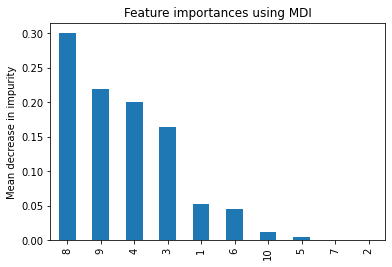

In [137]:
rf_importances = rfc3.feature_importances_
# rf_std = np.std([tree.feature_importances_ for tree in model_rf.best_estimator_.estimators_], axis=0)

feature_names = [f"{i}" for i in list([1,2,3,4,5,6,7,8,9,10])]
forest_importances = pd.Series(rf_importances, index=feature_names)
most_important = forest_importances[forest_importances > 0.00]
most_important = most_important.sort_values(ascending=False)

fig, ax = plt.subplots()
most_important.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

## Support Vector Machine
SVC(C= 10.0,degree= 2, kernel= 'rbf', probability = True) are determined to be the best parameters.

In [138]:
from sklearn.svm import SVC

svm_parameters = {'C': np.logspace(-1, 1, 3),
                  'kernel': ('linear', 'poly','rbf'),
                  'degree': [2,3]}

svm = GridSearchCV(estimator=SVC(probability=True),
                         param_grid= svm_parameters,
                         cv = 3,
                         scoring='roc_auc',
                         verbose = 3).fit(x_train_bowandtfidf,y_train)


Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV 1/3] END ....C=0.1, degree=2, kernel=linear;, score=0.992 total time=   0.0s
[CV 2/3] END ....C=0.1, degree=2, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/3] END ....C=0.1, degree=2, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/3] END ......C=0.1, degree=2, kernel=poly;, score=0.996 total time=   0.0s
[CV 2/3] END ......C=0.1, degree=2, kernel=poly;, score=1.000 total time=   0.0s
[CV 3/3] END ......C=0.1, degree=2, kernel=poly;, score=1.000 total time=   0.0s
[CV 1/3] END .......C=0.1, degree=2, kernel=rbf;, score=0.998 total time=   0.2s
[CV 2/3] END .......C=0.1, degree=2, kernel=rbf;, score=1.000 total time=   0.2s
[CV 3/3] END .......C=0.1, degree=2, kernel=rbf;, score=1.000 total time=   0.2s
[CV 1/3] END ....C=0.1, degree=3, kernel=linear;, score=0.992 total time=   0.0s
[CV 2/3] END ....C=0.1, degree=3, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/3] END ....C=0.1, degree=3, kernel=linear;

Accuracy Score: 0.9993785732040765
Precision Score: 0.9900124843945068
Recall Score: 0.9974842767295597
F1 Score: 0.9937343358395989
ROC Score: 0.9992726407076983


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


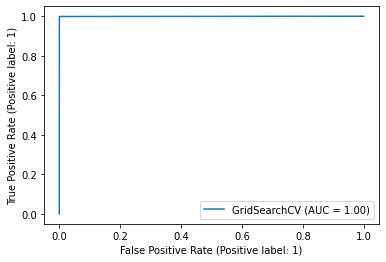

In [139]:
#svm = SVC(C= 10.0,degree= 2, kernel= 'rbf', probability = True).fit(x_train_bowandtfidf,y_train)
ypred = svm.predict(x_train_bowandtfidf)

print('Accuracy Score:', (accuracy_score(y_train, ypred)))
print('Precision Score:', (precision_score(y_train, ypred)))
print('Recall Score:', (recall_score(y_train,ypred)))
print('F1 Score:', (f1_score(y_train, ypred)))

y_score = svm.predict_proba(x_train_bowandtfidf)
print('ROC Score:', (roc_auc_score(y_train, y_score[:,1])))
print(plot_roc_curve(svm, x_train_bowandtfidf, y_train))

Accuracy Score: 0.988255033557047
Precision Score: 0.9464285714285714
Recall Score: 0.7464788732394366
F1 Score: 0.8346456692913385
ROC Score: 0.8635927387270623


c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


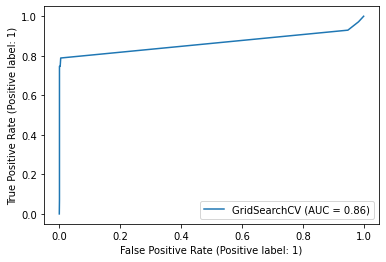

In [140]:
ypred_test = svm.predict(X_test_bowandtfidf)

print('Accuracy Score:', (accuracy_score(y_test, ypred_test)))
print('Precision Score:', (precision_score(y_test, ypred_test)))
print('Recall Score:', (recall_score(y_test,ypred_test)))
print('F1 Score:', (f1_score(y_test, ypred_test)))

y_score = svm.predict_proba(X_test_bowandtfidf)
print('ROC Score:', (roc_auc_score(y_test, y_score[:,1])))
print(plot_roc_curve(svm, X_test_bowandtfidf, y_test))


In [141]:
print(svm.best_params_)

{'C': 0.1, 'degree': 2, 'kernel': 'rbf'}


Text(0.5, 1.0, 'Most important features in SVM model')

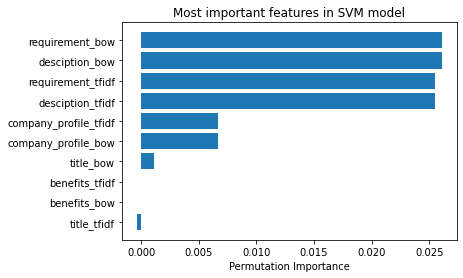

In [142]:
from sklearn.inspection import permutation_importance
svm = SVC(C= 10.0,degree= 2, kernel= 'rbf', probability = True).fit(x_train_bowandtfidf,y_train)
perm_importance = permutation_importance(svm, X_test_bowandtfidf, y_test)

feature_names = ['title_bow', 'company_profile_bow', 'desciption_bow', 'requirement_bow', 'benefits_bow', 'title_tfidf', 'company_profile_tfidf', 'desciption_tfidf', 'requirement_tfidf', 'benefits_tfidf']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Most important features in SVM model")



In [143]:
#Most important ngrams
desc_nb_tfidf = MultinomialNB(alpha= 0, fit_prior = True)
requirement_nb_tfidf = MultinomialNB(alpha= 0, fit_prior = True)

desc_result = desc_nb_tfidf.fit(X_train_description_tfidf, y_train)
requirement_result = requirement_nb_tfidf.fit(X_train_requirements_tfidf, y_train)

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


In [144]:
pos_class_prob_sorted_description = desc_nb_tfidf.feature_log_prob_[1, :].argsort()[::-1]
print(np.take(tfidf_vect_description.get_feature_names_out(), pos_class_prob_sorted_description[:10]))

['work' 'amp' 'We' 'position' 'skills' 'home' 'data' 'time' 'experience'
 'customer']


In [145]:
pos_class_prob_sorted_description = requirement_nb_tfidf.feature_log_prob_[1, :].argsort()[::-1]
print(np.take(tfidf_vect_description.get_feature_names_out(), pos_class_prob_sorted_description[:10]))

['assure quality standards consistentlyattained'
 'France Germany Central amp' 'evaluating maintaining'
 'help run Holiday Market' 'France headquarters UK Germany'
 'FranceABOUT MENTIONMention changes way' 'DevelopmentWe believe'
 'Products Inc leading' 'effectivelySupport mentor junior members'
 'background assist Kenya Nakuru']


## Logistic Regression
{'C': 0.1, 'penalty': 'l2', 'random_state': 1234, 'solver': 'liblinear'}  <br> The above is the determined best parameters.
<br> I did not choose this model as it underperformed in terms of ROC-AUC and F1 compared to the support vector machine.

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3] END C=0.1, penalty=l1, random_state=1234, solver=liblinear;, score=0.994 total time=   0.0s
[CV 2/3] END C=0.1, penalty=l1, random_state=1234, solver=liblinear;, score=1.000 total time=   0.0s
[CV 3/3] END C=0.1, penalty=l1, random_state=1234, solver=liblinear;, score=1.000 total time=   0.0s
[CV 1/3] END C=0.1, penalty=l1, random_state=1234, solver=saga;, score=0.994 total time=   1.7s
[CV 2/3] END C=0.1, penalty=l1, random_state=1234, solver=saga;, score=1.000 total time=   1.7s
[CV 3/3] END C=0.1, penalty=l1, random_state=1234, solver=saga;, score=1.000 total time=   0.0s
[CV 1/3] END C=0.1, penalty=l2, random_state=1234, solver=liblinear;, score=0.998 total time=   0.0s
[CV 2/3] END C=0.1, penalty=l2, random_state=1234, solver=liblinear;, score=1.000 total time=   0.0s
[CV 3/3] END C=0.1, penalty=l2, random_state=1234, solver=liblinear;, score=1.000 total time=   0.0s
[CV 1/3] END C=0.1, penalty=l2, random_state=

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


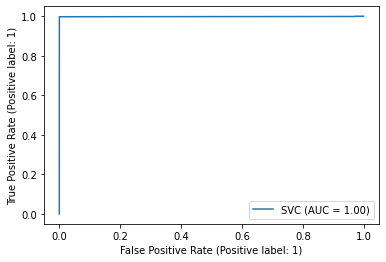

In [146]:
from sklearn.linear_model import LogisticRegression
lg_parameters = {'solver': ['liblinear', 'saga'],
                 'penalty': ["l1", "l2"],
                 'C': [0.1, 1, 10, 100, 200],
                 'random_state': [1234]}

logreg_tune = LogisticRegression(max_iter=5000)
lg_tune = GridSearchCV(logreg_tune,
                        lg_parameters,
                        cv = 3,
                        scoring = 'roc_auc',
                        verbose = 3)

logreg = lg_tune.fit(x_train_bowandtfidf,y_train)

#logreg = LogisticRegression(penalty="none", max_iter=5000, random_state=1234)
logreg.fit(x_train_bowandtfidf,y_train)
ypred = logreg.predict(x_train_bowandtfidf)
print('Accuracy Score:', (accuracy_score(y_train, ypred)))
print('Precision Score:', (precision_score(y_train, ypred)))
print('Recall Score:', (recall_score(y_train,ypred)))
print('F1 Score:', (f1_score(y_train, ypred)))

y_score = svm.predict_proba(x_train_bowandtfidf)
print('ROC Score:', (roc_auc_score(y_train, y_score[:,1])))
print(plot_roc_curve(svm, x_train_bowandtfidf, y_train))

c:\Users\hwhme\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Accuracy Score: 0.9871364653243848
Precision Score: 0.98
Recall Score: 0.6901408450704225
F1 Score: 0.8099173553719008
ROC Score: 0.8102241872903115


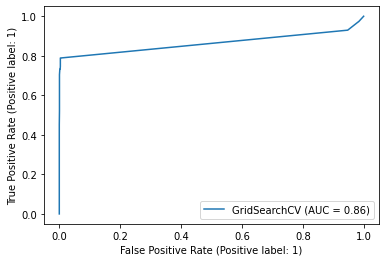

In [147]:
ypred_test = logreg.predict(X_test_bowandtfidf)

print('Accuracy Score:', (accuracy_score(y_test, ypred_test)))
print('Precision Score:', (precision_score(y_test, ypred_test)))
print('Recall Score:', (recall_score(y_test,ypred_test)))
print('F1 Score:', (f1_score(y_test, ypred_test)))

y_score = svm.predict_proba(X_test_bowandtfidf)
print('ROC Score:', (roc_auc_score(y_test, y_score[:,1])))
print(plot_roc_curve(logreg, X_test_bowandtfidf, y_test))


In [148]:
# Accuracy Score: 0.9860178970917226
# Precision Score: 0.927536231884058
# Recall Score: 0.7619047619047619
# F1 Score: 0.8366013071895425
# ROC Score: 0.9262659289067741

In [149]:
print(logreg.best_params_)

{'C': 100, 'penalty': 'l1', 'random_state': 1234, 'solver': 'saga'}


#Conclusion
The first level of the Ensemble comprises of 5 BOW matrices fed into the 5

# Experiment (old codes)

In [150]:
#this section was the old code which was used in an attempt to perform the first version of NLP. 
#import re
#import string
#import numpy as np
#import pandas as pd
#import random
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.model_selection import train_test_split
#from sklearn.pipeline import Pipeline
#from sklearn.base import TransformerMixin
#from sklearn.metrics import accuracy_score, plot_confusion_matrix, #classification_report, confusion_matrix
#import spacy
#from spacy.lang.en.stop_words import STOP_WORDS
#from spacy.lang.en import English

#import nltk
#nltk.download('omw-1.4')
#nltk.download('wordnet')
#from nltk.stem import WordNetLemmatizer 
#from nltk.stem.snowball import SnowballStemmer



In [151]:
#from google.colab import drive
#drive.mount('/content/drive')
#path = "/content/drive/MyDrive/mystuff/bt4012/"
#df=pd.read_csv(path + 'fake_job_postings.csv')

In [152]:
#df.head()

In [153]:
#df.isnull().sum()
#Clean up dataset for NLP
#df['text']=df['title']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']
#df_nlp0 = df[['text','job_id','fraudulent',]].copy()
#verify clean up 
#print(df_nlp0.head())

In [154]:
#import spacy
#from spacy.lang.en.stop_words import STOP_WORDS
#from spacy.lang.en import English
#stop_words = spacy.lang.en.stop_words.STOP_WORDS
#punctuation = string.punctuation

#def spacy_tokenizer(sentence):
#    tokens = English(sentence)
#    tokens = [ word.lemma_.lower().strip() 
#              if word.lemma_ != "-PRON-" 
#              else word.lower_ for word in tokens]
#    tokens = [ word for word in tokens 
#              if word not in stop_words and word not in punctuation]
#    return tokens
    
#def clean_text(text):
#    return text.strip().lower()

#df_nlp0['text'] = df_nlp0['text'].apply(clean_text)
#df_nlp0.head()

In [155]:
#from sklearn.model_selection import train_test_split
#from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#tf = TfidfVectorizer(max_features = 150)
#t = tf.fit_transform(df_nlp0['text'])
#df_nlp2 = pd.DataFrame(t.toarray(), columns=tf.get_feature_names_out())
#df_nlp0.drop(['text'], axis=1, inplace=True)
#df_nlp_t = pd.concat([df_nlp2,df_nlp0], axis=1)
#df_nlp_t.head()

In [156]:
#Y = df_nlp_t.iloc[:,-1]
#X = df_nlp_t.iloc[:,:-1]

#X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.4, random_state=1)
#X_test, X_val, y_test, y_val = train_test_split(X_test,Y_test,test_size=0.5, random_state=42) 

#print("X_train",X_train.shape)
#print("y_Train:",y_train.shape)
#print("X_Test",X_test.shape)
#print("y_test:",y_test.shape)
# print("X_val",X_val.shape)
# print("y_val", y_val.shape)

In [157]:
#Log regress
#from sklearn.linear_model import LogisticRegression

#LR = LogisticRegression(C=5e1, solver='lbfgs',multi_class='multinomial', random_state=17, n_jobs=4)
#LR_model=LR.fit(X_train, y_train)
#LR_pred_test = LR_model.predict(X_test)
# LR_pred_val = LR_model.predict(X_val)
#LR_score_test = accuracy_score(y_test, LR_pred_test)
# LR_score_val = accuracy_score(y_val, LR_pred_val)
#LR_cr_report_test = classification_report(y_test,LR_pred_test)
# LR_cr_report_val = classification_report(y_val,LR_pred_val)
#LR_cf_matrix_test = confusion_matrix(y_test, LR_pred_test)
# LR_cf_matrix_val = confusion_matrix(y_val, LR_pred_val)
#print("LR Score - Test set:",LR_score_test)
#print("LR Score - Validation set:",LR_score_val)
#print("Classification Report - Test set\n")
#print(LR_cr_report_test)
# print("Classification Report - Validation set\n")
# print(LR_cr_report_val)
#print("Confusion Matrix - test set\n")
#print(LR_cf_matrix_test)
# print("Confusion Matrix - Validation set\n")
# print(LR_cf_matrix_val)

In [158]:
#RFC 
#from sklearn.ensemble import RandomForestClassifier
#rfc= RandomForestClassifier(n_jobs=3,oob_score=True, criterion="gini")
#rfc_model=rfc.fit(X_train,y_train)
#rfc_pred_test = rfc_model.predict(X_test)
#rfc_pred_val = rfc_model.predict(X_val)
#rfc_score_test = accuracy_score(y_test, rfc_pred_test)
#rfc_score_val = accuracy_score(y_val,rfc_pred_val)
#rfc_cr_report_test=classification_report(y_test,rfc_pred_test)
#rfc_cr_report_val=classification_report(y_val,rfc_pred_val)
#rfc_cf_matrix_test = confusion_matrix(y_test, rfc_pred_test)
#rfc_cf_matrix_val = confusion_matrix(y_val,rfc_pred_val)

In [159]:
#print("Score - Test set:",rfc_score_test)
#print("Score - Validation set:",rfc_score_val)
#print("Classification Report - Test set\n")
#print(rfc_cr_report_test)
# print("Classification Report - Validation set\n")
# print(rfc_cr_report_val)
#print("Confusion Matrix - test set\n")
#print(rfc_cf_matrix_test)
# print("Confusion Matrix - Validation set\n")
# print(rfc_cf_matrix_val)

In [160]:
 #group_names = ["True Neg","False Pos", "False Neg", "True Pos"]
#group_counts_test = ["{0:0.0f}".format(value) for value in rfc_cf_matrix_test.flatten()]
#group_counts_val = ["{0:0.0f}".format(value) for value in rfc_cf_matrix_val.flatten()]
#group_percentages_test = ["{0:.2%}".format(value) for value in
                      #rfc_cf_matrix_test.flatten()/np.sum(rfc_cf_matrix_test)]
#group_percentages_val = ["{0:.2%}".format(value) for value in
                      #rfc_cf_matrix_val.flatten()/np.sum(rfc_cf_matrix_val)]
#labels_test = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts_test,group_percentages_test)]
#labels_val = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          #zip(group_names,group_counts_val,group_percentages_val)]
#labels_test = np.asarray(labels_test).reshape(2,2)
#labels_val = np.asarray(labels_val).reshape(2,2)
#plt.figure(figsize=(15,5))
#plt.subplot(1,2,1)
#plt.title("Confusion Matrix - Test set")
#sns.heatmap(rfc_cf_matrix_test, annot=labels_test,fmt='', cmap='Greens')
#plt.subplot(1,2,2)
# plt.title("Confusion Matrix - Validation Set")
# sns.heatmap(rfc_cf_matrix_val, annot=labels_val,fmt='', cmap='coolwarm_r')
# plt.show()

In [161]:
#Hype parameter tuning RFC
#RFC_acc = 0
#for criterion in ['gini', 'entropy']:
#  for n_jobs in [ 1, 2 , 3 , 4]:
#    for oob_score in ['True' , 'False']:
#       RFC_model_hp = RandomForestClassifier(criterion=criterion, n_jobs=n_jobs,oob_score=oob_score)
#       RFC_model_hp.fit(X_train, y_train)
#       RFC_test_predictions = RFC_model_hp.predict(X_test)
#       test_rfc = accuracy_score(y_test, RFC_test_predictions)
#       test_rfc_cr=classification_report(y_test,RFC_test_predictions)
#       if test_rfc > RFC_acc:
#         RFC_parameters = f"n_jobs:{n_jobs}, criterion:{criterion}, oob_score:{oob_score}"
#         RFC_acc = test_rfc

In [162]:
#print(RFC_parameters)
#print("HyperParameter tuning score (test set):",RFC_acc ,"\nExisting Model score (test set) :", rfc_score_test )
#print("Classification report\n ", test_rfc_cr )

In [163]:
#Decision Tree 
#DecisionTreeClassifier
#from sklearn.tree import DecisionTreeClassifier
#DT_class = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=10)
#DT_class = DT_class.fit(X_train,y_train)
#DT_pred_test = DT_class.predict(X_test)
#DT_pred_val = DT_class.predict(X_val)
#DT_score_test = accuracy_score(y_test, DT_pred_test)
#DT_score_val = accuracy_score(y_val,DT_pred_val)
#DT_cr_report_test=classification_report(y_test,DT_pred_test)
#DT_cr_report_val=classification_report(y_val,DT_pred_val)
#DT_cf_matrix_test = confusion_matrix(y_test, DT_pred_test)
#DT_cf_matrix_val = confusion_matrix(y_val,DT_pred_val)
#print("DT Score - Test set:",DT_score_test)
#print("DT Score - Validation set:",DT_score_val)
#print("Classification Report - Test set\n")
#print(DT_cr_report_test)
# print("Classification Report - Validation set\n")
# print(DT_cr_report_val)
#print("Confusion Matrix - test set\n")
#print(DT_cf_matrix_test)
# print("Confusion Matrix - Validation set\n")
# print(DT_cf_matrix_val)

In [164]:
#DTC_acc = 0 

#for criterion in ['gini', 'entropy']:
#  for max_depth in [7,8,9,10]:
#    for min_samples_leaf in [5,10,20,30]:
#      DTC_model_hp = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, min_samples_leaf=min_samples_leaf)
#      DTC_model_hp.fit(X_train, y_train)
#      DTC_test_predictions = DTC_model_hp.predict(X_test)
#      test_dtc = accuracy_score(y_test, DTC_test_predictions)
#      test_dtc_cr=classification_report(y_test,DTC_test_predictions)
#      if test_dtc > DTC_acc:
#        DTC_parameters = f"criterion:{criterion}, max_depth:{max_depth},min_samples_leaf:{min_samples_leaf}"
#        DTC_acc = test_dtc

In [165]:
#print(DTC_parameters)
#print("HyperParameter tuning score (test set):",DTC_acc ,"\nExisting Model score (test set) :", DT_score_test )
#print("Classification report\n ", test_dtc_cr )

In [166]:
#from sklearn.naive_bayes import MultinomialNB
#nb_clf = MultinomialNB()
#nb_clf.fit(X_train,y_train)
#y_trainpred = nb_clf.predict(X_train) #evaluate model on training
#y_testpred = nb_clf.predict(X_test) #evaluate on test

In [167]:
#nb_pred = nb_clf.predict(X_test)
#nb_score = accuracy_score(y_test, nb_pred)
#print(nb_score)

In [168]:
#print("Classification Report\n")
#print(classification_report(y_test,nb_pred))
#print("Confusion Matrix\n")
#print(confusion_matrix(y_test, nb_pred))

In [169]:
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, plot_roc_curve,roc_curve
#print("===================Logistic Regression================\n")
#print("LogReg Accuracy Score :", (accuracy_score(y_test,LR_pred_test)))
#print("LogReg Precision Score :", (precision_score(y_test,LR_pred_test)))
#print("LogReg Recall Score :", (recall_score(y_test,LR_pred_test)))
#print("LogReg F1 Score :", (f1_score(y_test,LR_pred_test)))
#print("LogReg ROC/AUC Score :", (roc_auc_score(y_test,LR_pred_test)))
#print("======================RFC=============================\n")
#print("RFC Acccuracy Score : ", (accuracy_score(y_test,rfc_pred_test)))
#print("RFC Precision Score : ", (precision_score(y_test, rfc_pred_test)))
#print("RFC Recall Score : ", (recall_score(y_test, rfc_pred_test)))
#print("RFC F1 Score : ", (f1_score(y_test, rfc_pred_test)))
#print("RFC ROC/AUC Score : ", (roc_auc_score(y_test, rfc_pred_test)))
#print("===================Decision Tree=====================\n")
#print("DTree Accuracy Score : ", (accuracy_score(y_test, DT_pred_test)))
#print("DTree Precision Score : ", (precision_score(y_test, DT_pred_test)))
#print("DTree Recall Score : ", (recall_score(y_test, DT_pred_test)))
#print("DTree F1 Score : ", (f1_score(y_test, DT_pred_test)))
#print("DTree ROC/AUC Score : ", (roc_auc_score(y_test, DT_pred_test)))
#print("===================Naive Bayes=====================\n")
#print("NB Accuracy Score : ", (accuracy_score(y_test, nb_pred)))
#print("NB Precision Score : ", (precision_score(y_test, nb_pred)))
#print("NB Recall Score : ", (recall_score(y_test, nb_pred)))
#print("NB F1 Score : ", (f1_score(y_test, nb_pred)))